In [ ]:
# illustrative example of use VeraRubin 

# Example of warping visits

> Version: 1.0
> 
> Container Size: Large

> Description:  In this notebook, we present an illustrative example of using the warp procedure from the VeraRubin package.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Complementary info
! echo $IMAGE_DESCRIPTION
! eups list -s | grep lsst_distrib

Release r29.2.0 (RSP Build 2244)
lsst_distrib          gc675d380bf+f75de59d28 	current o_latest v29_2_0 v29_2_0_rc1 setup


In [3]:
# Loading modules
import matplotlib.pyplot as plt
import VeraRubin as vr
import numpy as np
import lsst.geom

from lsst.daf.butler import Butler
from astropy.wcs import WCS

## Local repo Butler

In [4]:
LOCAL_REPO = "./local_butler" 
lbutler = Butler(LOCAL_REPO)  # writeable=True

In [5]:
# see the collections
collection_list = lbutler.registry.queryCollections()

lbutler = Butler(LOCAL_REPO, collections=collection_list, writeable=True)

ra_deg, dec_deg = (53.2, -27.8)
loc_data = ra_deg, dec_deg

## Warping

In [7]:
visit_warps, visit_refs = vr.custom_warp(butler=lbutler, loc=loc_data, band="u", instrument="LSSTComCam", datasetType="visit_image", skymap_name="lsst_cells_v1",
            # Optional advanced features
            filter_by_patch=False,        # use tract/patch to restrict visits
            filter_by_region=False,      # use visit_detector_region (if available)
            detectors=None,              # allowed detectors
            LOGDIR="warps",)

2025-12-23 05:57:45 [INFO] Created LOGDIR at warps


2025-12-23 05:57:45 [INFO] Starting warping process...


2025-12-23 05:57:45 [INFO] Selecting visits overlapping the patch...


2025-12-23 05:57:45 [INFO] [SELECT] Tract=5063, Patch=Index2D(x=4, y=3)


2025-12-23 05:57:45 [INFO] [SELECT] Candidate visits: 35


2025-12-23 05:58:19 [INFO] [SELECT] Overlapping visits: 7


2025-12-23 05:58:19 [INFO] Running warping task for selected visits...


2025-12-23 05:58:19 [INFO] [INF] Build WarpDetectorInputs


2025-12-23 05:58:20 [INFO] [INF] Warping visits: [2024113000172, 2024113000175, 2024113000176, 2024120100190]


2025-12-23 05:58:20 [INFO] Processing visit 2024113000172


2025-12-23 05:58:32 [INFO] WARP SAVED: visit=2024113000172


2025-12-23 05:58:32 [INFO] Processing visit 2024113000175


2025-12-23 05:58:45 [INFO] WARP SAVED: visit=2024113000175


2025-12-23 05:58:45 [INFO] Processing visit 2024113000176


2025-12-23 05:58:59 [INFO] WARP SAVED: visit=2024113000176


2025-12-23 05:58:59 [INFO] Processing visit 2024120100190


2025-12-23 05:59:09 [INFO] WARP SAVED: visit=2024120100190


2025-12-23 05:59:10 [INFO] Warping process completed.


## Visualizing the results

In [8]:
exposures_data = {ref.dataId['visit']:
    lbutler.get("visit_image", dataId=ref.dataId) for ref in visit_refs[:3]
}

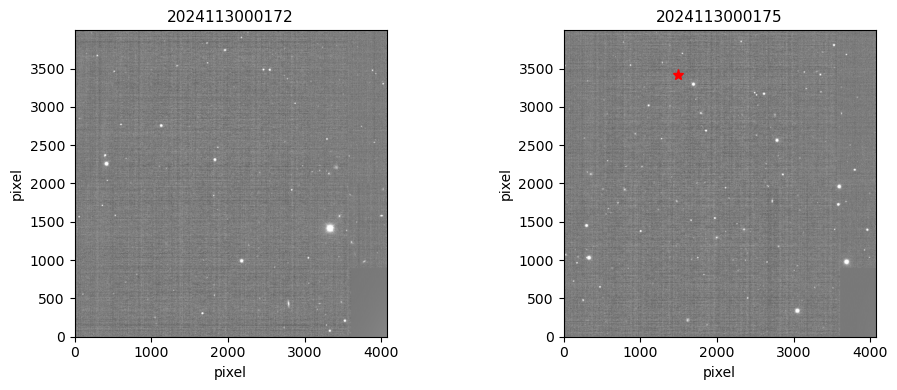

In [9]:
point_sky = lsst.geom.SpherePoint(ra_deg, dec_deg, lsst.geom.degrees)

vr.plot_exposures_full(exposures_data.values(),
                       center_coord=point_sky,
                       exposures_scale='percentile',
                       titles=list(map(str, exposures_data.keys())),
                       axeslabels=['pixel', 'pixel'],
                       grid=False)

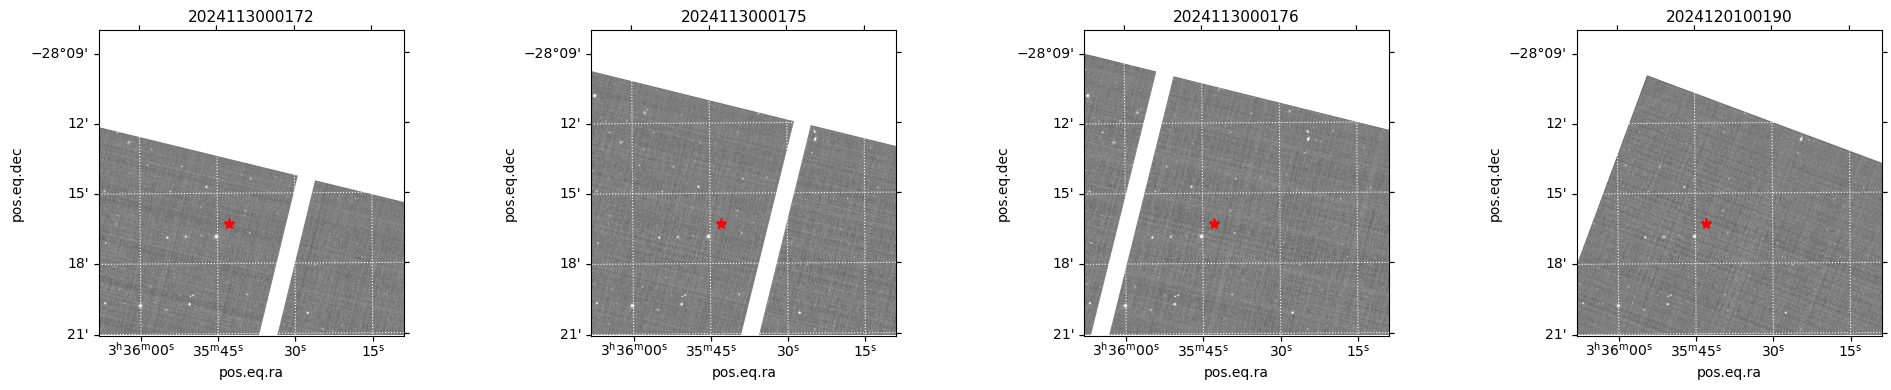

In [10]:
point_sky = lsst.geom.SpherePoint(ra_deg, dec_deg, lsst.geom.degrees)
awcs = WCS(next(iter(visit_warps.values())).getWcs().getFitsMetadata().toDict())

vr.plot_exposures_full(visit_warps.values(),
                       center_coord=point_sky,
                       exposures_scale='percentile',
                       titles=list(visit_warps.keys()),
                       #axeslabels=['pixel', 'pixel'],
                       projection=awcs,
                       grid=True,
                        )